**Estimación Puntual** 

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [0]:
np.random.seed(2020)  # Establezco la semilla de aleatoriedad
population_ages_1= stats.poisson.rvs(loc= 18, mu= 35, size=1500000)    #  loc es el 0 de la poisson, es decir desde donde empieza
population_ages_2= stats.poisson.rvs(loc= 18, mu= 10, size=1000000)
population_ages= np.concatenate((population_ages_1, population_ages_2))  # mezclo las dos poblaciones para tener un mix

print(population_ages_1.mean()) # para ver la media de la primera población
print(population_ages_2.mean())
print(population_ages.mean())

52.998824666666664
27.999569
42.9991224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2977f9cf28>]],
      dtype=object)

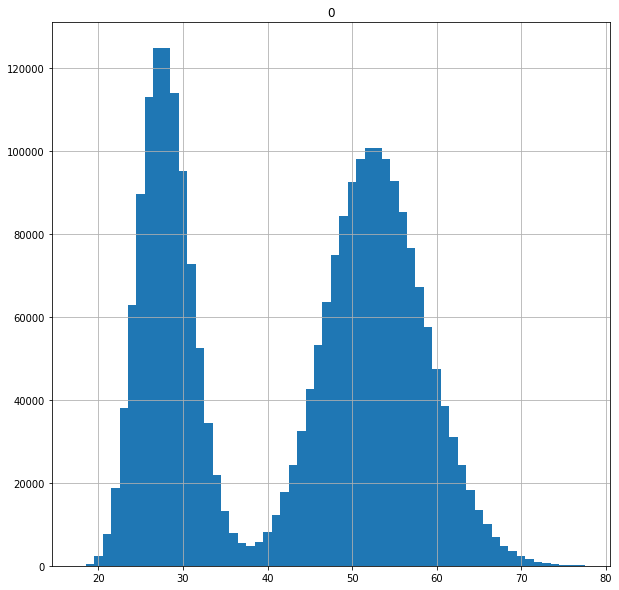

In [0]:
pd.DataFrame(population_ages).hist(bins= 60, range= (17.5, 77.5),figsize=(10,10))
# bins son 60 franjas
# range para decidir en donde empieza y termina
#  figsize es el tamño de la figura

In [0]:
stats.skew(population_ages) # nos dice el sesgo de la población

-0.11907136129560125

In [0]:
stats.kurtosis(population_ages)

-1.4593749125303193

In [0]:
np.random.seed(42)
sample_ages = np.random.choice(population_ages, 500)  # muestra aleatoria simple en donde eligo de population_ages , 500 muestras
print(sample_ages.mean())

42.356


In [0]:
population_ages.mean() - sample_ages.mean()

0.6431223999999958

In [0]:
random.seed(31)
population_races = (["blanca"]*1000000) + (["negra"]*500000) + (["hispana"]*500000)+ (["asiatica"]*250000) + (["otros"]*250000)

In [0]:
for race in set(population_races):
  print("Proporción de "+race)
  print(population_races.count(race) / 2500000)

Proporción de negra
0.2
Proporción de blanca
0.4
Proporción de hispana
0.2
Proporción de otros
0.1
Proporción de asiatica
0.1


In [0]:
random.seed(31)
race_sample = random.sample(population_races, 1000)

In [0]:
for race in set(race_sample):
  print("Proporción de "+race)
  print(race_sample.count(race) / 1000)

Proporción de negra
0.217
Proporción de blanca
0.379
Proporción de hispana
0.201
Proporción de otros
0.102
Proporción de asiatica
0.101


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2979878eb8>]],
      dtype=object)

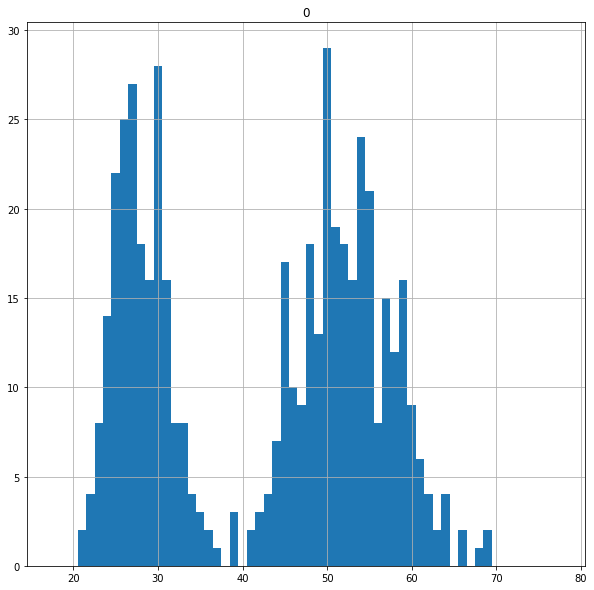

In [0]:
pd.DataFrame(sample_ages).hist(bins= 60, range= (17.5, 77.5),figsize=(10,10))


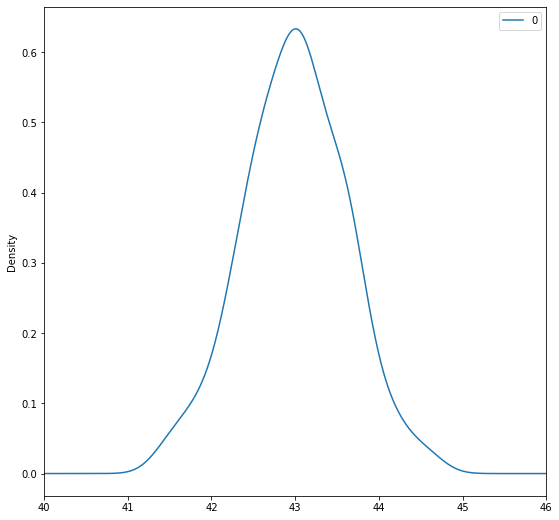

In [0]:
np.random.sample(1988)
point_estimates = []
for x in range(200) :
  sample = np.random.choice(population_ages,size = 500)
  point_estimates.append(sample.mean())

pd.DataFrame(point_estimates).plot(kind= "density", figsize = (9,9), xlim=(40,46))

In [0]:
np.array(point_estimates).mean()

42.99669

In [0]:
np.random.seed(10)
n = 1000
alpha=0.05

sample = np.random.choice(population_ages, size= n)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q= 1 - alpha/2)

sigma= population_ages.std()  # Desvío de la población, esto en gral no lo tenemos , habra que estimarlo

sample_error = z_critical * sigma / math.sqrt(n)

ci =(sample_mean - sample_error, sample_mean + sample_error)
ci

(42.23912299964774, 43.878877000352254)

**Si la desviación típica es conocida**

In [0]:
np.random.seed(10)

n = 1000
alpha=0.05

intervals =[]
sample_means = []

z_critical = stats.norm.ppf(q= 1 - alpha/2)
sigma= population_ages.std()  # Desvío de la población, esto en gral no lo tenemos , habra que estimarlo
sample_error = z_critical * sigma / math.sqrt(n)


for sample in range(100):

  sample = np.random.choice(population_ages, size= n)
  sample_mean = sample.mean()
  sample_means.append(sample_mean)

  ci =(sample_mean - sample_error, sample_mean + sample_error)
  intervals.append(ci)

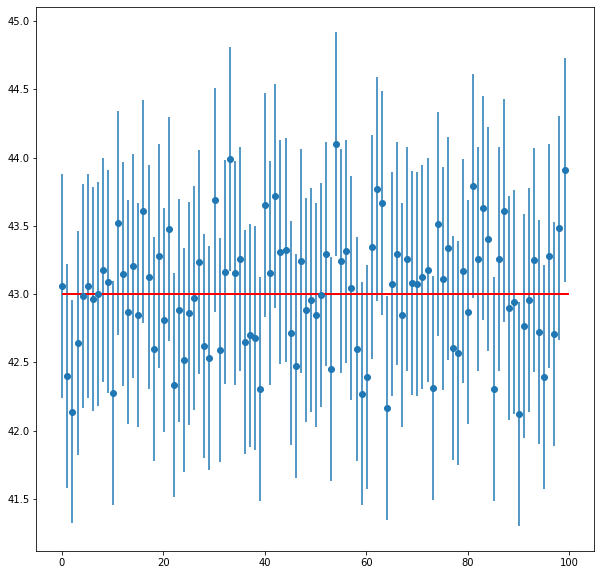

In [0]:
plt.figure(figsize=(10,10))
plt.errorbar(x=np.arange(0.1,100,1), y=sample_means,yerr=[(top-bottom)/2 for top,bottom in intervals], fmt= 'o' ) 
# top = extremo superior , bottom = extremo inferior
plt.hlines(xmin=0, xmax=100, y =population_ages.mean(), linewidth=2.0, color="red")

**Si la desviación típica no es conocida...**

In [7]:
np.random.seed(10)

n = 25
alpha=0.05

intervals =[]
sample_means = []

z_critical = stats.t.ppf(q= 1 - alpha/2, df = n-1)
sample_sd= sample.std(ddof=1)  # Desviación estándar de la muestra , el ddof es para indicar que divida por n-1
sample_error = z_critical * sample_sd / math.sqrt(n)

ci =(sample_mean - sample_error, sample_mean + sample_error)
ci



AttributeError: ignored

In [0]:
stats.t.ppf(q = 1-alpha, df=n-1) - stats.norm.ppf(1-alpha)

0.06602845295795534

In [0]:
stats.t.ppf(q = 1-alpha, df= 999) - stats.norm.ppf(1-alpha)  # df es el grado de libertad

0.0015267184760627828

In [0]:
stats.t.interval(alpha=0.95, df= 24, loc = sample_mean, scale = sample_sd/math.sqrt(n)) # loc = media , scale = desvío

(38.49469291813515, 49.32930708186485)

**Intervalo de confianza para una proporción por laplace**

In [8]:
alpha = 0.05
n=1000
z_critical = stats.norm.ppf(q=1-alpha/2)
p_hat = race_sample.count('blanca')/n


sample_error = z_critical * math.sqrt((p_hat * (1-p_hat)/n))

ci= (p_hat - sample_error, p_hat + sample_error)
ci

NameError: ignored

In [0]:
stats.norm.interval(alpha=0.95, loc= p_hat, scale= math.sqrt(p_hat*(1-p_hat)/n))

(0.34893138003533003, 0.40906861996467)

**Como interpretar el intervalo de confianza**


In [4]:
shape, scale = 2.0, 2.0 # mean = 4, std = 2*sqrt(2)
s = np.random.gamma(shape,scale, 1000000)

mu = shape*scale
sigma = scale*np.sqrt(shape)
print(mu)
print(sigma)

4.0
2.8284271247461903


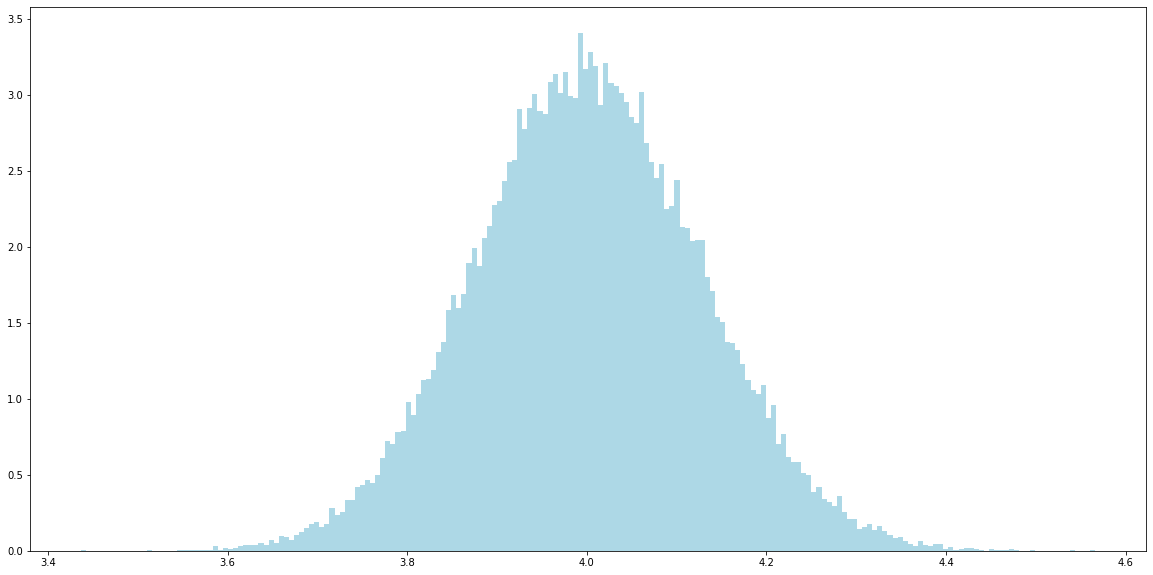

In [9]:
meansample = []
sample_size = 500
for i in range(0,50000):
  sample = random.choices(s, k=sample_size)
  meansample.append(sum(sample)/len(sample))

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color="lightblue")  # 200 particiones para que la dimensión sea finita
# True para que la densidad de la integral valga 1
plt.show()

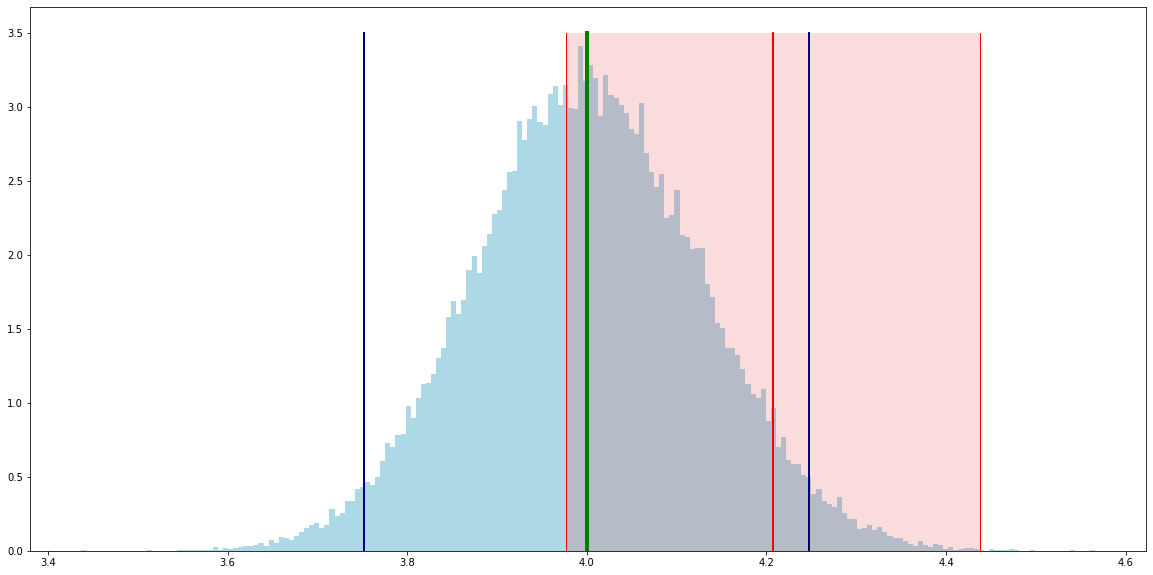

In [42]:
sample_data= np.random.choice(s, size=sample_size)
x_bar = sample_data.mean()
ss = sample_data.std()



plt.figure(figsize=(20,10))
plt.hist(meansample,200,density=True, color="lightblue")
plt.plot([mu,mu],[0,3.5],'k-', lw=4, color='green') # En el valor mu de "x" 2 veces, empezará en mu=0 hasta mu=3.5 ( recta vertival ), 'k-' en forma continua de linea, que sea gruesa es decir lw=4
plt.plot([mu-1.96*sigma/np.sqrt(sample_size) , mu-1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color='navy')
plt.plot([mu+1.96*sigma/np.sqrt(sample_size) , mu+1.96*sigma/np.sqrt(sample_size)], [0,3.5], 'k-', lw=2, color='navy')
plt.plot([x_bar, x_bar],[0,3.5],'k-', lw=2, color='red')

plt.plot([x_bar-1.96*ss/np.sqrt(sample_size), x_bar-1.96*ss/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=1, color="red")
plt.plot([x_bar+1.96*ss/np.sqrt(sample_size), x_bar+1.96*ss/np.sqrt(sample_size)], [0, 3.5], 'k-', lw=1, color="red")
plt.gca().add_patch(plt.Rectangle((x_bar-1.96*ss/np.sqrt(sample_size), 0), 2*(1.96*ss/np.sqrt(sample_size)), 3.5, fill=True, fc=(0.9, 0.1, 0.1, 0.15)))
## 0 es el primero de los vértices , la anchura es 2 veces la amplitud, la altura es 3.5 de altura, el fill es para que lo rellene, fc (fill color)= coordenadas del color (0,9 en rojo, 0.1 en verde,0.1 en azul y 0.2 en la transparencia para que no me quede muy rojo  )
plt.show()

In [0]:
interval_list = []
z_critical = 1.96
sample_size = 20000
c = 0
error = z_critical* sigma/np.sqrt(sample_size)
for i in range(0,100):
  rs = random.choices(s, k=sample_size)
  mean= np.mean(rs)
  ub= mean + error # upper bound
  lb= mean - error # lower bound
  interval_list.append([lb, mean,ub])
  if ub >= mu and lb<= mu:
    c += 1

In [53]:
c

98

Números de intervalos de confianza que contienen el valor real de mu:  96


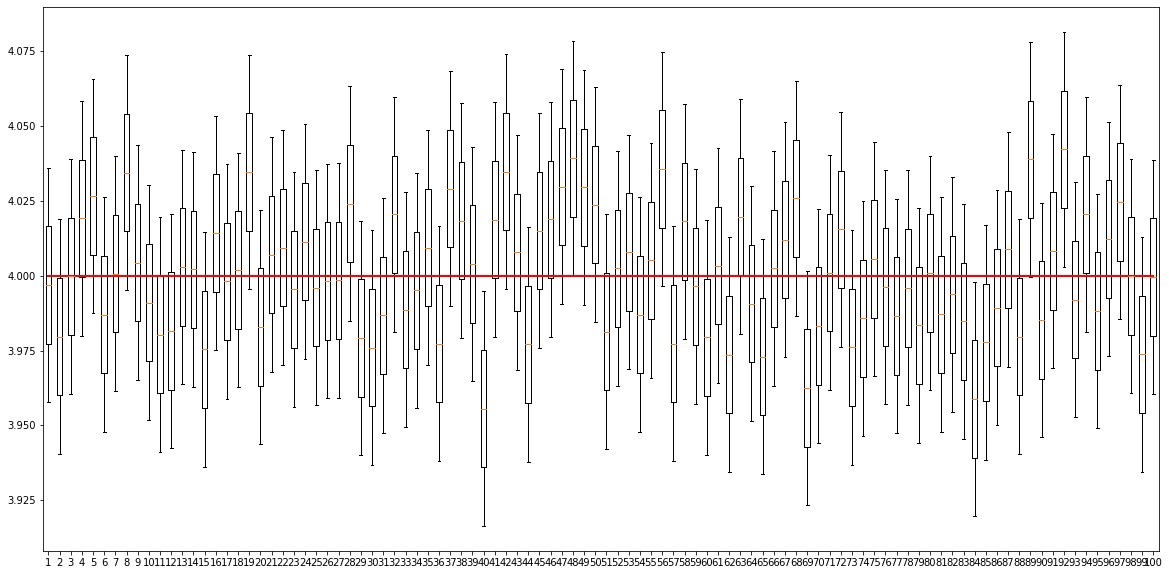

In [71]:
print('Números de intervalos de confianza que contienen el valor real de mu: ',c)
plt.figure(figsize=(20,10))
plt.boxplot(interval_list)
plt.plot([1,100],[mu,mu], 'k-', lw=2, color='red') ## 'k-' es linea continuea, lw= anchura
plt.show()

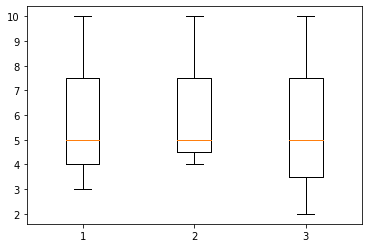

In [67]:
### Prueba que hice yo para ver como grafica una lista
pr= []
pr.append([3,5,10])
pr.append([4,5,10])
pr.append([2,5,10])
plt.boxplot(pr)
plt.show()